## Introduction

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

import plotly.graph_objects as go
from shapely.geometry import Point

## Feature engineering

In [2]:
# Preprocessing / Feature engineering
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [3]:
path = "D:/Allaus/Code/train/2_both_based_on_ptz/DataBase_IDW.csv"
df = pd.read_csv(path)
df

,ELEVmean,SLOPEmax,ASPECTmajo,CURVPLmean,CURVPRmean,ORIENTmajo,FORESTmajo,ROCKSmajor,SCREESmajo,SNCOVERmea,...,TRANGEmean,SNTOTmean,SN24Hmean,SN48Hmean,SN72Hmean,SNACCUMmea,WDIRmajori,WSPMEANmea,WSPMAXmean,Avalanche
0,1511,56,6,-1.15,1.27,0,0,1,0,0.000,...,9.4,52.9,2.3,4.4,6.4,51.9,265,5.6,13.0,1
1,1789,48,8,0.66,-0.15,1,1,0,0,0.000,...,9.4,51.7,2.3,4.4,6.4,51.7,252,5.6,14.1,1
2,1613,73,5,-3.43,17.57,0,0,1,0,0.000,...,9.8,49.1,2.2,4.3,6.3,51.1,273,5.7,13.1,1
3,1552,62,4,-1.19,0.59,0,1,1,0,0.000,...,9.9,48.3,2.2,4.3,6.2,50.9,271,5.7,13.0,1
4,1371,70,6,0.46,0.35,0,1,0,0,0.000,...,10.0,47.4,2.2,4.2,6.2,50.7,275,5.7,12.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,8,-0.22,0.10,1,0,0,0,0.592,...,8.1,67.8,2.4,4.5,6.4,44.5,264,8.0,31.6,0
2296,2266,31,1,-0.30,-0.38,1,1,0,0,0.478,...,7.8,68.9,2.4,4.5,6.5,46.7,262,7.9,32.0,0
2297,1705,45,4,0.60,-0.38,0,1,0,0,0.000,...,9.9,84.2,2.9,5.4,7.9,70.1,74,5.7,19.4,0
2298,2377,32,5,0.00,-0.01,0,0,0,0,0.621,...,8.1,71.7,2.5,4.8,7.0,56.7,186,6.0,25.9,0


In [4]:
df.columns

Index(['ELEVmean', 'SLOPEmax', 'ASPECTmajo', 'CURVPLmean', 'CURVPRmean',
       'ORIENTmajo', 'FORESTmajo', 'ROCKSmajor', 'SCREESmajo', 'SNCOVERmea',
       'SHALSmean', 'RAINmean', 'RAIN2Dmean', 'RAIN3Dmean', 'RAINXTRMme',
       'RAINACCUMm', 'TMINmean', 'TMAXmean', 'TMEANmean', 'TRANGEmean',
       'SNTOTmean', 'SN24Hmean', 'SN48Hmean', 'SN72Hmean', 'SNACCUMmea',
       'WDIRmajori', 'WSPMEANmea', 'WSPMAXmean', 'Avalanche'],
      dtype='object')

In [5]:
df = df.rename(columns={'ELEVmean': 'Elevation', 'SLOPEmax': 'Slope',
                        'ASPECTmajo': 'Aspect', 'CURVPLmean': 'CurvaturePlan', 'CURVPRmean': 'CurvatureProf',
                        'ORIENTmajo': 'OrientationToNorth', 'FORESTmajo': 'Forest', 'ROCKSmajor': 'Rocks', 
                        'SCREESmajo': 'Screes', 'SNCOVERmea': 'SnowCover', 
                        'SHALSmean': 'CriticalRecharge', 'RAINmean': 'Rain', 'RAIN2Dmean': 'Rain2D', 
                        'RAIN3Dmean': 'Rain3D', 'TMINmean': 'Tmin', 'TMAXmean': 'Tmax', 'TMEANmean': 'Tmean', 
                        'TRANGEmean': 'Trange', 'RAINACCUMm': 'MonthlyRain', 'SNACCUMmea': 'MonthlySnow', 
                        'SNTOTmean': 'SnowTotal', 'SN24Hmean': 'Snow24h', 'SN48Hmean': 'Snow48h', 'SN72Hmean': 'Snow72h', 
                        'WDIRmajori': 'WindDirection', 'WSPMEANmea': 'WindSpeedMean', 'WSPMAXmean': 'WindSpeedMax', 
                        'RAINXTRMme': 'ExtremeRain'})
df

,Elevation,Slope,Aspect,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,...,Trange,SnowTotal,Snow24h,Snow48h,Snow72h,MonthlySnow,WindDirection,WindSpeedMean,WindSpeedMax,Avalanche
0,1511,56,6,-1.15,1.27,0,0,1,0,0.000,...,9.4,52.9,2.3,4.4,6.4,51.9,265,5.6,13.0,1
1,1789,48,8,0.66,-0.15,1,1,0,0,0.000,...,9.4,51.7,2.3,4.4,6.4,51.7,252,5.6,14.1,1
2,1613,73,5,-3.43,17.57,0,0,1,0,0.000,...,9.8,49.1,2.2,4.3,6.3,51.1,273,5.7,13.1,1
3,1552,62,4,-1.19,0.59,0,1,1,0,0.000,...,9.9,48.3,2.2,4.3,6.2,50.9,271,5.7,13.0,1
4,1371,70,6,0.46,0.35,0,1,0,0,0.000,...,10.0,47.4,2.2,4.2,6.2,50.7,275,5.7,12.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,8,-0.22,0.10,1,0,0,0,0.592,...,8.1,67.8,2.4,4.5,6.4,44.5,264,8.0,31.6,0
2296,2266,31,1,-0.30,-0.38,1,1,0,0,0.478,...,7.8,68.9,2.4,4.5,6.5,46.7,262,7.9,32.0,0
2297,1705,45,4,0.60,-0.38,0,1,0,0,0.000,...,9.9,84.2,2.9,5.4,7.9,70.1,74,5.7,19.4,0
2298,2377,32,5,0.00,-0.01,0,0,0,0,0.621,...,8.1,71.7,2.5,4.8,7.0,56.7,186,6.0,25.9,0


In [6]:
df.columns

Index(['Elevation', 'Slope', 'Aspect', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindDirection',
       'WindSpeedMean', 'WindSpeedMax', 'Avalanche'],
      dtype='object')

In [7]:
df.dtypes

Elevation               int64
Slope                   int64
Aspect                  int64
CurvaturePlan         float64
CurvatureProf         float64
OrientationToNorth      int64
Forest                  int64
Rocks                   int64
Screes                  int64
SnowCover             float64
CriticalRecharge      float64
Rain                  float64
Rain2D                float64
Rain3D                float64
ExtremeRain           float64
MonthlyRain           float64
Tmin                  float64
Tmax                  float64
Tmean                 float64
Trange                float64
SnowTotal             float64
Snow24h               float64
Snow48h               float64
Snow72h               float64
MonthlySnow           float64
WindDirection           int64
WindSpeedMean         float64
WindSpeedMax          float64
Avalanche               int64
dtype: object

In [8]:
df.Aspect.unique()

array([6, 8, 5, 4, 7, 3, 2, 1, 0], dtype=int64)

In [9]:
df.WindDirection.unique()

array([265, 252, 273, 271, 275, 164, 170, 187, 176, 177, 191, 185, 189,
       199, 183, 120, 100, 272, 270, 166, 167, 162, 249, 255, 174, 173,
        39,  95,  93,  83,  68, 124, 119, 121, 116, 111, 148, 154, 155,
       165, 156, 158, 109, 134, 118, 112,  73, 175, 184, 179, 180, 181,
       192,  88,  90,  98, 102, 101, 131, 133, 122, 206, 198, 209, 232,
       188, 186, 178, 171, 161, 163, 159, 169, 223, 222, 242, 236, 244,
       221, 216, 214, 202, 197, 200, 204, 205, 212, 203, 201, 193, 195,
       194, 196, 151, 141, 132, 282, 276, 248, 211, 208, 172, 168, 190,
       142, 217, 126, 117,  47,  38,  41,  18,  16, 128,  75,  76,  74,
       227, 228, 233, 238, 240, 256, 261, 266, 231, 225, 220, 160, 115,
       291, 254, 262, 283, 258, 247, 229, 219, 123, 130, 129, 139, 143,
       152, 136, 138, 153, 157, 150,  42,  44,  66, 182, 135, 137, 235,
       140, 105, 144, 239, 234, 127, 145, 146, 149, 125, 106, 110, 213,
       224, 237, 250,  46,  96,  92,  97,  59, 230, 267, 274, 20

In [10]:
for i in range(len(df)):
    if ((df.loc[i, 'WindDirection'] >= 0) and (df.loc[i, 'WindDirection'] <= 22.5)) or ((df.loc[i, 'WindDirection'] > 337.5) and (df.loc[i, 'WindDirection'] <= 360)):
        df.loc[i, 'dirmode'] = 'North'
    elif (df.loc[i, 'WindDirection'] > 22.5) and (df.loc[i, 'WindDirection'] <= 67.5):
        df.loc[i, 'dirmode'] = 'North East'
    elif (df.loc[i, 'WindDirection'] > 67.5) and (df.loc[i, 'WindDirection'] <= 112.5):
        df.loc[i, 'dirmode'] = 'East'
    elif (df.loc[i, 'WindDirection'] > 112.5) and (df.loc[i, 'WindDirection'] <= 157.5):
        df.loc[i, 'dirmode'] = 'South-East'
    elif (df.loc[i, 'WindDirection'] > 157.5) and (df.loc[i, 'WindDirection'] <= 202.5):
        df.loc[i, 'dirmode'] = 'South'
    elif (df.loc[i, 'WindDirection'] > 202.5) and (df.loc[i, 'WindDirection'] <= 247.5):
        df.loc[i, 'dirmode'] = 'South-West'
    elif (df.loc[i, 'WindDirection'] > 247.5) and (df.loc[i, 'WindDirection'] <= 292.5):
        df.loc[i, 'dirmode'] = 'West'
    else:
        df.loc[i, 'dirmode'] = 'North-West'
                
for i in range(len(df)):
    if (df.loc[i, 'Aspect'] == 0):
        df.loc[i, 'asp'] = 'Flat'
    elif (df.loc[i, 'Aspect'] == 1):
        df.loc[i, 'asp'] = 'North'
    elif (df.loc[i, 'Aspect'] == 2):
        df.loc[i, 'asp'] = 'North-East'
    elif (df.loc[i, 'Aspect'] == 3):
        df.loc[i, 'asp'] = 'East'
    elif (df.loc[i, 'Aspect'] == 4):
        df.loc[i, 'asp'] = 'South-East'
    elif (df.loc[i, 'Aspect'] == 5):
        df.loc[i, 'asp'] = 'South'
    elif (df.loc[i, 'Aspect'] == 6):
        df.loc[i, 'asp'] = 'South-West'
    elif (df.loc[i, 'Aspect'] == 7):
        df.loc[i, 'asp'] = 'West'
    else:
        df.loc[i, 'asp'] = 'North-West'
          
df       


,Elevation,Slope,Aspect,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,...,Snow24h,Snow48h,Snow72h,MonthlySnow,WindDirection,WindSpeedMean,WindSpeedMax,Avalanche,dirmode,asp
0,1511,56,6,-1.15,1.27,0,0,1,0,0.000,...,2.3,4.4,6.4,51.9,265,5.6,13.0,1,West,South-West
1,1789,48,8,0.66,-0.15,1,1,0,0,0.000,...,2.3,4.4,6.4,51.7,252,5.6,14.1,1,West,North-West
2,1613,73,5,-3.43,17.57,0,0,1,0,0.000,...,2.2,4.3,6.3,51.1,273,5.7,13.1,1,West,South
3,1552,62,4,-1.19,0.59,0,1,1,0,0.000,...,2.2,4.3,6.2,50.9,271,5.7,13.0,1,West,South-East
4,1371,70,6,0.46,0.35,0,1,0,0,0.000,...,2.2,4.2,6.2,50.7,275,5.7,12.9,1,West,South-West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,8,-0.22,0.10,1,0,0,0,0.592,...,2.4,4.5,6.4,44.5,264,8.0,31.6,0,West,North-West
2296,2266,31,1,-0.30,-0.38,1,1,0,0,0.478,...,2.4,4.5,6.5,46.7,262,7.9,32.0,0,West,North
2297,1705,45,4,0.60,-0.38,0,1,0,0,0.000,...,2.9,5.4,7.9,70.1,74,5.7,19.4,0,East,South-East
2298,2377,32,5,0.00,-0.01,0,0,0,0,0.621,...,2.5,4.8,7.0,56.7,186,6.0,25.9,0,South,South


In [ ]:
# for i in range(len(df)):
#     if ((df.loc[i, 'WindDirection'] >= 0) and (df.loc[i, 'WindDirection'] <= 22.5)) or ((df.loc[i, 'WindDirection'] > 337.5) and (df.loc[i, 'WindDirection'] <= 360)):
#         df.loc[i, 'dirmode'] = 'North'
#     elif (df.loc[i, 'WindDirection'] > 22.5) and (df.loc[i, 'WindDirection'] <= 157.5):
#         df.loc[i, 'dirmode'] = 'NE-E-SE'
#     elif (df.loc[i, 'WindDirection'] > 157.5) and (df.loc[i, 'WindDirection'] <= 202.5):
#         df.loc[i, 'dirmode'] = 'South'
#     else:
#         df.loc[i, 'dirmode'] = 'SW-W-NW'
                
# for i in range(len(df)):
#     if (df.loc[i, 'Aspect'] == 0):
#         df.loc[i, 'asp'] = 'Flat'
#     elif (df.loc[i, 'Aspect'] == 1)  or (df.loc[i, 'Aspect'] == 2) or (df.loc[i, 'Aspect'] == 8):
#         df.loc[i, 'asp'] = 'NW-N-NE'
#     elif (df.loc[i, 'Aspect'] == 3):
#         df.loc[i, 'asp'] = 'East'
#     elif (df.loc[i, 'Aspect'] == 4) or (df.loc[i, 'Aspect'] == 5) or (df.loc[i, 'Aspect'] == 6):
#         df.loc[i, 'asp'] = 'SE-S-SW'
#     else:
#         df.loc[i, 'asp'] = 'West'

# df       

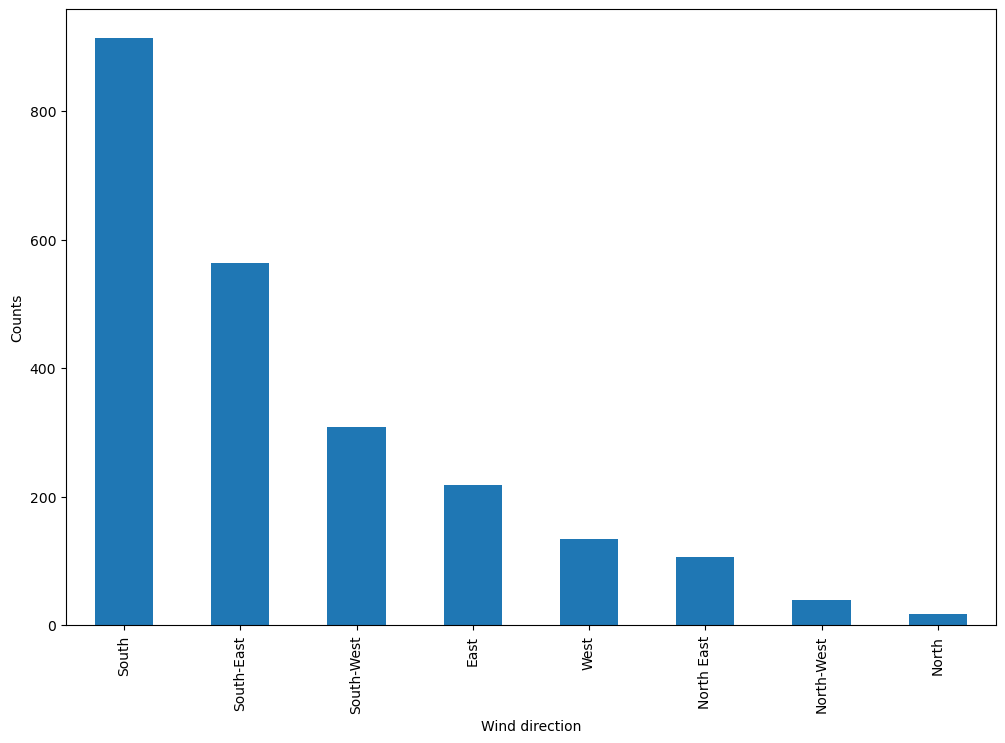

In [18]:
plt.figure(figsize=(12, 8))
df.value_counts("dirmode").plot(kind="bar")
plt.xlabel("Wind direction")
plt.ylabel("Counts")
plt.savefig("D:/Allaus/Manuscript/pictures_and_figures/wind direction - labels countplot.png")
plt.show();

<Axes: xlabel='asp'>

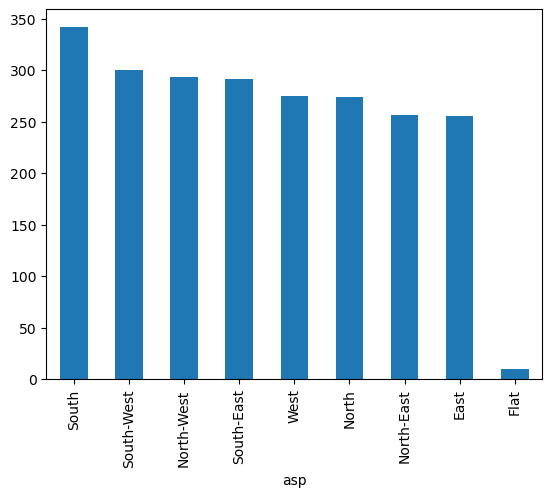

In [13]:
df.value_counts("asp").plot(kind="bar")

In [13]:
df['dirmode'].unique()

array(['West', 'South', 'South-East', 'East', 'North East', 'South-West',
       'North', 'North-West'], dtype=object)

In [14]:
df['asp'].unique()

array(['South-West', 'North-West', 'South', 'South-East', 'West', 'East',
       'North-East', 'North', 'Flat'], dtype=object)

In [15]:
data_crosstab1 = pd.crosstab(df['dirmode'], df['asp'], margins = False)  # not very useful
data_crosstab1

asp,East,Flat,North,North-East,North-West,South,South-East,South-West,West
dirmode,,,,,,,,,
East,32,1,40,23,35,33,22,18,14
North,0,0,2,1,2,2,2,2,6
North East,11,0,18,9,21,5,21,9,12
North-West,1,0,17,8,3,1,5,2,2
South,100,2,103,125,107,158,101,123,94
South-East,72,3,51,66,62,78,72,90,70
South-West,29,2,30,19,44,46,42,41,56
West,11,2,13,6,20,19,27,15,21


In [16]:
for i in range(len(df)):
    if (df.loc[i, 'dirmode'] == 'North') and (df.loc[i, 'asp'] == 'South' or df.loc[i, 'asp'] == 'South-West' or df.loc[i, 'asp'] == 'South-East'):
        df.loc[i, 'transp'] = 1
    elif (df.loc[i, 'dirmode'] == 'North-East') and (df.loc[i, 'asp'] == 'South' or df.loc[i, 'asp'] == 'South-West' or df.loc[i, 'asp'] == 'West'):
        df.loc[i, 'transp'] = 1
    elif (df.loc[i, 'dirmode'] == 'East') and (df.loc[i, 'asp'] == 'North-West' or df.loc[i, 'asp'] == 'South-West' or df.loc[i, 'asp'] == 'West'):
        df.loc[i, 'transp'] = 1
    elif (df.loc[i, 'dirmode'] == 'South-East') and (df.loc[i, 'asp'] == 'North-West' or df.loc[i, 'asp'] == 'North' or df.loc[i, 'asp'] == 'West'):
        df.loc[i, 'transp'] = 1
    elif (df.loc[i, 'dirmode'] == 'South') and (df.loc[i, 'asp'] == 'North-West' or df.loc[i, 'asp'] == 'North' or df.loc[i, 'asp'] == 'North-East'):
        df.loc[i, 'transp'] = 1
    elif (df.loc[i, 'dirmode'] == 'South-West') and (df.loc[i, 'asp'] == 'East' or df.loc[i, 'asp'] == 'North' or df.loc[i, 'asp'] == 'North-East'):
        df.loc[i, 'transp'] = 1
    elif (df.loc[i, 'dirmode'] == 'West') and (df.loc[i, 'asp'] == 'East' or df.loc[i, 'asp'] == 'South-East' or df.loc[i, 'asp'] == 'North-East'):
        df.loc[i, 'transp'] = 1
    elif (df.loc[i, 'dirmode'] == 'North-West') and (df.loc[i, 'asp'] == 'East' or df.loc[i, 'asp'] == 'South-East' or df.loc[i, 'asp'] == 'South'):
        df.loc[i, 'transp'] = 1
    else:
        df.loc[i, 'transp'] = 0

df    
        

,Elevation,Slope,Aspect,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,...,Snow48h,Snow72h,MonthlySnow,WindDirection,WindSpeedMean,WindSpeedMax,Avalanche,dirmode,asp,transp
0,1511,56,6,-1.15,1.27,0,0,1,0,0.000,...,4.4,6.4,51.9,265,5.6,13.0,1,West,South-West,0.0
1,1789,48,8,0.66,-0.15,1,1,0,0,0.000,...,4.4,6.4,51.7,252,5.6,14.1,1,West,North-West,0.0
2,1613,73,5,-3.43,17.57,0,0,1,0,0.000,...,4.3,6.3,51.1,273,5.7,13.1,1,West,South,0.0
3,1552,62,4,-1.19,0.59,0,1,1,0,0.000,...,4.3,6.2,50.9,271,5.7,13.0,1,West,South-East,1.0
4,1371,70,6,0.46,0.35,0,1,0,0,0.000,...,4.2,6.2,50.7,275,5.7,12.9,1,West,South-West,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,8,-0.22,0.10,1,0,0,0,0.592,...,4.5,6.4,44.5,264,8.0,31.6,0,West,North-West,0.0
2296,2266,31,1,-0.30,-0.38,1,1,0,0,0.478,...,4.5,6.5,46.7,262,7.9,32.0,0,West,North,0.0
2297,1705,45,4,0.60,-0.38,0,1,0,0,0.000,...,5.4,7.9,70.1,74,5.7,19.4,0,East,South-East,0.0
2298,2377,32,5,0.00,-0.01,0,0,0,0,0.621,...,4.8,7.0,56.7,186,6.0,25.9,0,South,South,0.0


In [17]:
df.transp.sum()

720.0

In [18]:
df.isna().sum()

Elevation             0
Slope                 0
Aspect                0
CurvaturePlan         0
CurvatureProf         0
OrientationToNorth    0
Forest                0
Rocks                 0
Screes                0
SnowCover             0
CriticalRecharge      0
Rain                  0
Rain2D                0
Rain3D                0
ExtremeRain           0
MonthlyRain           0
Tmin                  0
Tmax                  0
Tmean                 0
Trange                0
SnowTotal             0
Snow24h               0
Snow48h               0
Snow72h               0
MonthlySnow           0
WindDirection         0
WindSpeedMean         0
WindSpeedMax          0
Avalanche             0
dirmode               0
asp                   0
transp                0
dtype: int64

In [19]:
df.isnull().sum()    # same as above

Elevation             0
Slope                 0
Aspect                0
CurvaturePlan         0
CurvatureProf         0
OrientationToNorth    0
Forest                0
Rocks                 0
Screes                0
SnowCover             0
CriticalRecharge      0
Rain                  0
Rain2D                0
Rain3D                0
ExtremeRain           0
MonthlyRain           0
Tmin                  0
Tmax                  0
Tmean                 0
Trange                0
SnowTotal             0
Snow24h               0
Snow48h               0
Snow72h               0
MonthlySnow           0
WindDirection         0
WindSpeedMean         0
WindSpeedMax          0
Avalanche             0
dirmode               0
asp                   0
transp                0
dtype: int64

In [ ]:
# df['CN'].unique()

In [ ]:
# dict_cn_from = {4:'West', 5:'North'}
# df['Snowdrift'] = df['CN'].map(dict_cn_from)
# df

In [20]:
df.dtypes

Elevation               int64
Slope                   int64
Aspect                  int64
CurvaturePlan         float64
CurvatureProf         float64
OrientationToNorth      int64
Forest                  int64
Rocks                   int64
Screes                  int64
SnowCover             float64
CriticalRecharge      float64
Rain                  float64
Rain2D                float64
Rain3D                float64
ExtremeRain           float64
MonthlyRain           float64
Tmin                  float64
Tmax                  float64
Tmean                 float64
Trange                float64
SnowTotal             float64
Snow24h               float64
Snow48h               float64
Snow72h               float64
MonthlySnow           float64
WindDirection           int64
WindSpeedMean         float64
WindSpeedMax          float64
Avalanche               int64
dirmode                object
asp                    object
transp                float64
dtype: object

In [21]:
df = df.drop(columns=['WindDirection', 'Aspect'])
df

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Snow24h,Snow48h,Snow72h,MonthlySnow,WindSpeedMean,WindSpeedMax,Avalanche,dirmode,asp,transp
0,1511,56,-1.15,1.27,0,0,1,0,0.000,21.000000,...,2.3,4.4,6.4,51.9,5.6,13.0,1,West,South-West,0.0
1,1789,48,0.66,-0.15,1,1,0,0,0.000,2680.500000,...,2.3,4.4,6.4,51.7,5.6,14.1,1,West,North-West,0.0
2,1613,73,-3.43,17.57,0,0,1,0,0.000,266.300000,...,2.2,4.3,6.3,51.1,5.7,13.1,1,West,South,0.0
3,1552,62,-1.19,0.59,0,1,1,0,0.000,70.200000,...,2.2,4.3,6.2,50.9,5.7,13.0,1,West,South-East,1.0
4,1371,70,0.46,0.35,0,1,0,0,0.000,78.900000,...,2.2,4.2,6.2,50.7,5.7,12.9,1,West,South-West,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,-0.22,0.10,1,0,0,0,0.592,2633.034951,...,2.4,4.5,6.4,44.5,8.0,31.6,0,West,North-West,0.0
2296,2266,31,-0.30,-0.38,1,1,0,0,0.478,872.143383,...,2.4,4.5,6.5,46.7,7.9,32.0,0,West,North,0.0
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,2.9,5.4,7.9,70.1,5.7,19.4,0,East,South-East,0.0
2298,2377,32,0.00,-0.01,0,0,0,0,0.621,3319.897190,...,2.5,4.8,7.0,56.7,6.0,25.9,0,South,South,0.0


In [22]:
df = df.rename(columns={'dirmode': 'WindDirection', 'asp': 'Aspect', 'transp': 'PotentialSnowTransport'})
df

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Snow24h,Snow48h,Snow72h,MonthlySnow,WindSpeedMean,WindSpeedMax,Avalanche,WindDirection,Aspect,PotentialSnowTransport
0,1511,56,-1.15,1.27,0,0,1,0,0.000,21.000000,...,2.3,4.4,6.4,51.9,5.6,13.0,1,West,South-West,0.0
1,1789,48,0.66,-0.15,1,1,0,0,0.000,2680.500000,...,2.3,4.4,6.4,51.7,5.6,14.1,1,West,North-West,0.0
2,1613,73,-3.43,17.57,0,0,1,0,0.000,266.300000,...,2.2,4.3,6.3,51.1,5.7,13.1,1,West,South,0.0
3,1552,62,-1.19,0.59,0,1,1,0,0.000,70.200000,...,2.2,4.3,6.2,50.9,5.7,13.0,1,West,South-East,1.0
4,1371,70,0.46,0.35,0,1,0,0,0.000,78.900000,...,2.2,4.2,6.2,50.7,5.7,12.9,1,West,South-West,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,-0.22,0.10,1,0,0,0,0.592,2633.034951,...,2.4,4.5,6.4,44.5,8.0,31.6,0,West,North-West,0.0
2296,2266,31,-0.30,-0.38,1,1,0,0,0.478,872.143383,...,2.4,4.5,6.5,46.7,7.9,32.0,0,West,North,0.0
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,2.9,5.4,7.9,70.1,5.7,19.4,0,East,South-East,0.0
2298,2377,32,0.00,-0.01,0,0,0,0,0.621,3319.897190,...,2.5,4.8,7.0,56.7,6.0,25.9,0,South,South,0.0


In [23]:
df.columns

Index(['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindSpeedMean',
       'WindSpeedMax', 'Avalanche', 'WindDirection', 'Aspect',
       'PotentialSnowTransport'],
      dtype='object')

In [24]:
df.dtypes

Elevation                   int64
Slope                       int64
CurvaturePlan             float64
CurvatureProf             float64
OrientationToNorth          int64
Forest                      int64
Rocks                       int64
Screes                      int64
SnowCover                 float64
CriticalRecharge          float64
Rain                      float64
Rain2D                    float64
Rain3D                    float64
ExtremeRain               float64
MonthlyRain               float64
Tmin                      float64
Tmax                      float64
Tmean                     float64
Trange                    float64
SnowTotal                 float64
Snow24h                   float64
Snow48h                   float64
Snow72h                   float64
MonthlySnow               float64
WindSpeedMean             float64
WindSpeedMax              float64
Avalanche                   int64
WindDirection              object
Aspect                     object
PotentialSnowT

In [25]:
data_crosstab2 = pd.crosstab(df['WindDirection'], df['PotentialSnowTransport'], margins = False)   # not so useful either
data_crosstab2

PotentialSnowTransport,0.0,1.0
WindDirection,,
East,151,67
North,11,6
North East,106,0
North-West,32,7
South,578,335
South-East,381,183
South-West,231,78
West,90,44


In [26]:
data_crosstab3 = pd.crosstab(df['Aspect'], df['PotentialSnowTransport'], margins = False)   # this is kind of useful
data_crosstab3                                                                     # to see which slopes are on the lee side

PotentialSnowTransport,0.0,1.0
Aspect,,
East,215,41
Flat,10,0
North,90,184
North-East,107,150
North-West,90,204
South,339,3
South-East,258,34
South-West,280,20
West,191,84


In [27]:
# Check some correlations

df['Elevation'].corr(df.SnowCover)   # That's a good result, the higher the more snow cover

0.8243113013941765

In [28]:
df['Tmax'].corr(df.Trange)

0.8177105754927356

In [29]:
df.columns

Index(['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindSpeedMean',
       'WindSpeedMax', 'Avalanche', 'WindDirection', 'Aspect',
       'PotentialSnowTransport'],
      dtype='object')

In [30]:
len(df.columns)

30

In [ ]:
# Organize the columns into a nicer order

len(['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindSpeedMean',
       'WindSpeedMax', 'Avalanche', 'WindDirection', 'Aspect',
       'PotentialSnowTransport'])

30

In [32]:
new_cols = ['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindSpeedMean',
       'WindSpeedMax', 'WindDirection', 'Aspect',
       'PotentialSnowTransport', 'Avalanche']
df = df.reindex(columns=new_cols)
df

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Snow24h,Snow48h,Snow72h,MonthlySnow,WindSpeedMean,WindSpeedMax,WindDirection,Aspect,PotentialSnowTransport,Avalanche
0,1511,56,-1.15,1.27,0,0,1,0,0.000,21.000000,...,2.3,4.4,6.4,51.9,5.6,13.0,West,South-West,0.0,1
1,1789,48,0.66,-0.15,1,1,0,0,0.000,2680.500000,...,2.3,4.4,6.4,51.7,5.6,14.1,West,North-West,0.0,1
2,1613,73,-3.43,17.57,0,0,1,0,0.000,266.300000,...,2.2,4.3,6.3,51.1,5.7,13.1,West,South,0.0,1
3,1552,62,-1.19,0.59,0,1,1,0,0.000,70.200000,...,2.2,4.3,6.2,50.9,5.7,13.0,West,South-East,1.0,1
4,1371,70,0.46,0.35,0,1,0,0,0.000,78.900000,...,2.2,4.2,6.2,50.7,5.7,12.9,West,South-West,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,-0.22,0.10,1,0,0,0,0.592,2633.034951,...,2.4,4.5,6.4,44.5,8.0,31.6,West,North-West,0.0,0
2296,2266,31,-0.30,-0.38,1,1,0,0,0.478,872.143383,...,2.4,4.5,6.5,46.7,7.9,32.0,West,North,0.0,0
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,2.9,5.4,7.9,70.1,5.7,19.4,East,South-East,0.0,0
2298,2377,32,0.00,-0.01,0,0,0,0,0.621,3319.897190,...,2.5,4.8,7.0,56.7,6.0,25.9,South,South,0.0,0


In [33]:
df.dtypes

Elevation                   int64
Slope                       int64
CurvaturePlan             float64
CurvatureProf             float64
OrientationToNorth          int64
Forest                      int64
Rocks                       int64
Screes                      int64
SnowCover                 float64
CriticalRecharge          float64
Rain                      float64
Rain2D                    float64
Rain3D                    float64
ExtremeRain               float64
MonthlyRain               float64
Tmin                      float64
Tmax                      float64
Tmean                     float64
Trange                    float64
SnowTotal                 float64
Snow24h                   float64
Snow48h                   float64
Snow72h                   float64
MonthlySnow               float64
WindSpeedMean             float64
WindSpeedMax              float64
WindDirection              object
Aspect                     object
PotentialSnowTransport    float64
Avalanche     

In [ ]:
# # Round all the numerical columns, so that they look better when we plot the tree

# df1 = pd.DataFrame()
# for col in df.select_dtypes(include=['float64']).columns:
#      df1[col] = df[col].apply(lambda x: round(x, 1))
# df1

In [34]:
df.shape

(2300, 30)

## Explorative plots 
To visualize the dataset, check the overlap of the target classes, have a quick idea of feature significance etc.

In [ ]:
for col in df.iloc[:,:-1]:
    plt.hist(df[df['Avalanche'] == 1][col], color='red', label='Susceptible', alpha=0.7, density=True) # density normalizes these distributions
    plt.hist(df[df['Avalanche'] == 0][col], color='blue', label='Not susceptible', alpha=0.7, density=True)
    plt.title(col)
    plt.ylabel('Probability')
    plt.xlabel(col)
    plt.legend()
    plt.show();

In [ ]:
# # Alternative plotting

# sns.pairplot(df, hue='Allaus', diag_kind='hist')
# #plt.savefig('D:/Allaus/Data_analysis/ML/pairplot_ptz.png', dpi=300)
# plt.show();

## One-hot Encoding

In [ ]:
ohe = OneHotEncoder()

OneHotEncoder()

In [36]:
df.dtypes

Elevation                   int64
Slope                       int64
CurvaturePlan             float64
CurvatureProf             float64
OrientationToNorth          int64
Forest                      int64
Rocks                       int64
Screes                      int64
SnowCover                 float64
CriticalRecharge          float64
Rain                      float64
Rain2D                    float64
Rain3D                    float64
ExtremeRain               float64
MonthlyRain               float64
Tmin                      float64
Tmax                      float64
Tmean                     float64
Trange                    float64
SnowTotal                 float64
Snow24h                   float64
Snow48h                   float64
Snow72h                   float64
MonthlySnow               float64
WindSpeedMean             float64
WindSpeedMax              float64
WindDirection              object
Aspect                     object
PotentialSnowTransport    float64
Avalanche     

In [37]:
ohe.fit_transform(df[['Aspect', 'WindDirection']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
feature_array = ohe.fit_transform(df[['Aspect', 'WindDirection']]).toarray()

In [39]:
ohe.categories_

[array(['East', 'Flat', 'North', 'North-East', 'North-West', 'South',
        'South-East', 'South-West', 'West'], dtype=object),
 array(['East', 'North', 'North East', 'North-West', 'South', 'South-East',
        'South-West', 'West'], dtype=object)]

In [ ]:
# feature_labels = ohe.categories_   
# feature_labels           # It doesn't work though, cause I have same classes for different features

In [40]:
# So, I found this workaround

x = [['Aspect_East', 'Flat', 'Aspect_North', 'Aspect_North-East', 'Aspect_North-West', 'Aspect_South', 
      'Aspect_South-East', 'Aspect_South-West', 'Aspect_West'], 
     ['Wind_East', 'Wind_North', 'Wind_North-East', 'Wind_North-West', 'Wind_South', 'Wind_South-East', 
      'Wind_South-West', 'Wind_West']]
merged_list = sum([sublist for sublist in x], [])
print(merged_list)

['Aspect_East', 'Flat', 'Aspect_North', 'Aspect_North-East', 'Aspect_North-West', 'Aspect_South', 'Aspect_South-East', 'Aspect_South-West', 'Aspect_West', 'Wind_East', 'Wind_North', 'Wind_North-East', 'Wind_North-West', 'Wind_South', 'Wind_South-East', 'Wind_South-West', 'Wind_West']


In [41]:
feature_labels = merged_list
print(len(feature_labels))

17


In [42]:
pd.DataFrame(feature_array, columns = feature_labels)

,Aspect_East,Flat,Aspect_North,Aspect_North-East,Aspect_North-West,Aspect_South,Aspect_South-East,Aspect_South-West,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2296,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2297,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
features_encoded = pd.DataFrame(feature_array, columns = feature_labels)
features_encoded.head()

,Aspect_East,Flat,Aspect_North,Aspect_North-East,Aspect_North-West,Aspect_South,Aspect_South-East,Aspect_South-West,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
pd.concat([df, features_encoded], axis=1)     # swstos o arithmos sthlwn!

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_South-West,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West
0,1511,56,-1.15,1.27,0,0,1,0,0.000,21.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1789,48,0.66,-0.15,1,1,0,0,0.000,2680.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1613,73,-3.43,17.57,0,0,1,0,0.000,266.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1552,62,-1.19,0.59,0,1,1,0,0.000,70.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1371,70,0.46,0.35,0,1,0,0,0.000,78.900000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,-0.22,0.10,1,0,0,0,0.592,2633.034951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2296,2266,31,-0.30,-0.38,1,1,0,0,0.478,872.143383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,2377,32,0.00,-0.01,0,0,0,0,0.621,3319.897190,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
df_encoded = pd.concat([df, features_encoded], axis=1)
df_encoded.head()

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_South-West,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West
0,1511,56,-1.15,1.27,0,0,1,0,0.0,21.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1789,48,0.66,-0.15,1,1,0,0,0.0,2680.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1613,73,-3.43,17.57,0,0,1,0,0.0,266.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1552,62,-1.19,0.59,0,1,1,0,0.0,70.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1371,70,0.46,0.35,0,1,0,0,0.0,78.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
df_encoded = df_encoded.drop(columns=['Aspect', 'WindDirection', 'Flat'])
df_encoded

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_South-West,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West
0,1511,56,-1.15,1.27,0,0,1,0,0.000,21.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1789,48,0.66,-0.15,1,1,0,0,0.000,2680.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1613,73,-3.43,17.57,0,0,1,0,0.000,266.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1552,62,-1.19,0.59,0,1,1,0,0.000,70.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1371,70,0.46,0.35,0,1,0,0,0.000,78.900000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,-0.22,0.10,1,0,0,0,0.592,2633.034951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2296,2266,31,-0.30,-0.38,1,1,0,0,0.478,872.143383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,2377,32,0.00,-0.01,0,0,0,0,0.621,3319.897190,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
for col in df_encoded.loc[:, ~df_encoded.columns.isin(['Avalanche'])]:
    plt.hist(df_encoded[df_encoded['Avalanche'] == 1][col], color='red', label='Susceptible', alpha=0.7, density=True) # density normalizes these distributions
    plt.hist(df_encoded[df_encoded['Avalanche'] == 0][col], color='blue', label='Not susceptible', alpha=0.7, density=True)
    plt.title(col)
    plt.ylabel('Probability')
    plt.xlabel(col)
    plt.legend()
    plt.show();       

In [47]:
df_encoded.columns

Index(['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindSpeedMean',
       'WindSpeedMax', 'PotentialSnowTransport', 'Avalanche', 'Aspect_East',
       'Aspect_North', 'Aspect_North-East', 'Aspect_North-West',
       'Aspect_South', 'Aspect_South-East', 'Aspect_South-West', 'Aspect_West',
       'Wind_East', 'Wind_North', 'Wind_North-East', 'Wind_North-West',
       'Wind_South', 'Wind_South-East', 'Wind_South-West', 'Wind_West'],
      dtype='object')

In [48]:
new_cols_enc = ['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindSpeedMean',
       'WindSpeedMax', 'PotentialSnowTransport', 'Aspect_East',
       'Aspect_North', 'Aspect_North-East', 'Aspect_North-West',
       'Aspect_South', 'Aspect_South-East', 'Aspect_South-West', 'Aspect_West',
       'Wind_East', 'Wind_North', 'Wind_North-East', 'Wind_North-West',
       'Wind_South', 'Wind_South-East', 'Wind_South-West', 'Wind_West', 'Avalanche']
df_encoded = df_encoded.reindex(columns=new_cols_enc)
df_encoded

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West,Avalanche
0,1511,56,-1.15,1.27,0,0,1,0,0.000,21.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1789,48,0.66,-0.15,1,1,0,0,0.000,2680.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,1613,73,-3.43,17.57,0,0,1,0,0.000,266.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1552,62,-1.19,0.59,0,1,1,0,0.000,70.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1371,70,0.46,0.35,0,1,0,0,0.000,78.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,-0.22,0.10,1,0,0,0,0.592,2633.034951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2296,2266,31,-0.30,-0.38,1,1,0,0,0.478,872.143383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2298,2377,32,0.00,-0.01,0,0,0,0,0.621,3319.897190,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [49]:
df_encoded.to_csv("D:/Allaus/Code/train/2_both_based_on_ptz/DataBase_IDW_preprocessed.csv", index=False)